In [1]:
import numpy as np

In [2]:
np.version


<module 'numpy.version' from '/usr/local/lib/python3.6/dist-packages/numpy/version.py'>

In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
trainy[0]

5

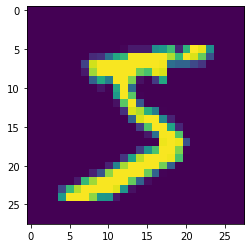

In [9]:
plt.imshow(trainX[0])

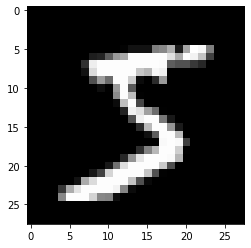

In [10]:
plt.imshow(trainX[0], cmap='gray')

In [11]:
trainX = trainX.reshape(60000, 28, 28, 1)
testX = testX.reshape(10000, 28, 28, 1)


In [12]:
trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [13]:
print(trainy_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from keras import layers
#build the cnn model
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [16]:
train_images = trainX.reshape((60000, 28, 28, 1))
train_images = trainX.astype('float32') / 255
test_images = testX.reshape((10000, 28, 28, 1))
test_images = testX.astype('float32') / 255
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)


In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 52ms/step - loss: 0.3977 - accuracy: 0.8810
Epoch 2/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0511 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0207 - accuracy: 0.9933


In [19]:
 test_loss,test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0315 - accuracy: 0.9903


In [20]:
test_acc 

0.9902999997138977

In [21]:
hist = model.fit(trainX,trainy_one_hot, validation_data=(testX, testy_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 59s 31ms/step - loss: 1.0858 - accuracy: 0.9800 - val_loss: 0.2055 - val_accuracy: 0.9839
Epoch 2/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0999 - accuracy: 0.9874 - val_loss: 0.1312 - val_accuracy: 0.9824
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0539 - accuracy: 0.9888 - val_loss: 0.1108 - val_accuracy: 0.9835


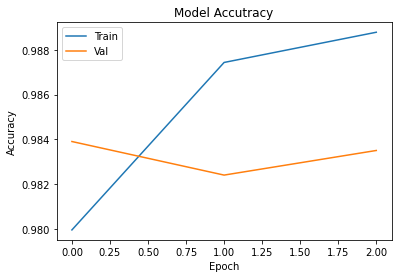

In [22]:
#visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accutracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='upper left')
plt.show()

In [23]:
#predictions as probabilites
predictions = model.predict(testX[:5])
predictions


array([[1.17270236e-20, 1.17272503e-27, 9.91404224e-13, 7.28736588e-21,
        2.48502444e-22, 2.16196516e-18, 5.63064457e-34, 1.00000000e+00,
        4.30963825e-22, 8.19174203e-15],
       [4.17890225e-33, 2.03892786e-25, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.62314032e-35, 4.66639777e-28, 0.00000000e+00,
        1.68861455e-27, 0.00000000e+00],
       [4.46592383e-19, 9.99998927e-01, 4.95001479e-12, 4.23934052e-22,
        1.07106714e-16, 2.54410626e-08, 1.19333756e-13, 4.63501195e-19,
        1.04396668e-06, 1.15097749e-17],
       [1.00000000e+00, 1.91779990e-26, 1.79863656e-22, 1.90146872e-25,
        9.33560428e-26, 5.88152084e-17, 4.14711939e-13, 3.43683739e-28,
        9.46314584e-25, 4.28099478e-23],
       [0.00000000e+00, 9.27410801e-30, 3.59572035e-28, 0.00000000e+00,
        1.00000000e+00, 8.85257173e-34, 1.78885995e-28, 0.00000000e+00,
        1.57732230e-26, 4.34352378e-21]], dtype=float32)

In [24]:
#predictions as numbers labels
import numpy as np
print(np.argmax(predictions, axis=1))
print(testy[:5])

[7 2 1 0 4]
[7 2 1 0 4]


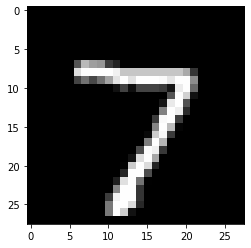

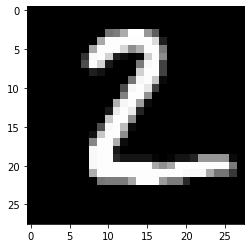

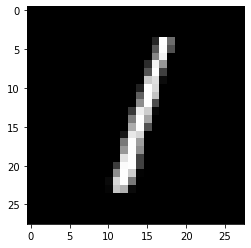

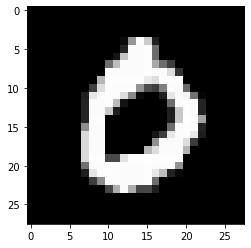

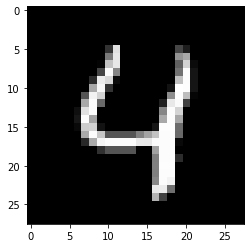

In [25]:
#visualization as images
for i in range(0,5):
 image = testX[i]
 image = np.array(image, dtype='float')
 pixels = image.reshape((28,28))
 plt.imshow(pixels, cmap = 'gray')
 plt.show()

In [26]:
## Change_1

In [27]:
from keras import layers
#build the cnn model
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='sigmoid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='sigmoid'))
model.add(Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [29]:
train_images = trainX.reshape((60000, 28, 28, 1))
train_images = trainX.astype('float32') / 255
test_images = testX.reshape((10000, 28, 28, 1))
test_images = testX.astype('float32') / 255
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)


In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 140s 148ms/step - loss: 1.5571 - accuracy: 0.4234
Epoch 2/5
938/938 [==============================] - 139s 148ms/step - loss: 0.1094 - accuracy: 0.9687
Epoch 3/5
938/938 [==============================] - 137s 146ms/step - loss: 0.0645 - accuracy: 0.9800
Epoch 4/5
938/938 [==============================] - 139s 148ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 5/5
938/938 [==============================] - 139s 148ms/step - loss: 0.0352 - accuracy: 0.9894


In [32]:
 test_loss,test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.0375 - accuracy: 0.9867


In [33]:
test_acc 

0.9866999983787537

In [34]:
hist = model.fit(trainX,trainy_one_hot, validation_data=(testX, testy_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0582 - accuracy: 0.9812 - val_loss: 0.0356 - val_accuracy: 0.9884
Epoch 2/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 3/3
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0370 - val_accuracy: 0.9884


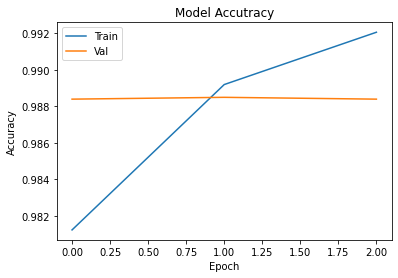

In [35]:
#visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accutracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='upper left')
plt.show()

In [36]:
#predictions as probabilites
predictions = model.predict(testX[:5])
predictions


array([[2.6073278e-07, 3.5849719e-06, 1.3378539e-05, 4.1119824e-06,
        2.3556763e-06, 2.4856294e-07, 4.3704329e-10, 9.9996591e-01,
        4.4290388e-07, 9.7856800e-06],
       [2.8846548e-06, 5.7455158e-04, 9.9936038e-01, 1.7283402e-05,
        8.5217636e-07, 3.7854824e-07, 1.8618277e-05, 8.1905654e-07,
        2.4255638e-05, 1.5357882e-08],
       [2.4960181e-08, 9.9998784e-01, 3.5652633e-07, 1.7411436e-07,
        1.8338555e-06, 2.7896382e-07, 1.8246376e-06, 2.9787373e-06,
        4.6556625e-06, 1.3565732e-07],
       [9.9343610e-01, 1.7261707e-06, 1.7141487e-05, 9.7711404e-07,
        1.1024632e-06, 3.2923410e-05, 6.4772135e-03, 3.9177035e-06,
        1.6242393e-05, 1.2693395e-05],
       [1.5043171e-06, 6.2990682e-07, 2.6060600e-06, 1.0681024e-07,
        9.9982041e-01, 8.3668745e-08, 2.5842558e-06, 9.9549121e-05,
        1.4467606e-06, 7.0977978e-05]], dtype=float32)

In [37]:
#predictions as numbers labels
import numpy as np
print(np.argmax(predictions, axis=1))
print(testy[:5])

[7 2 1 0 4]
[7 2 1 0 4]


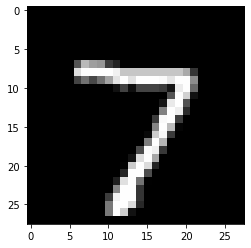

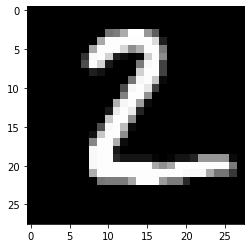

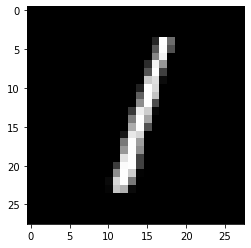

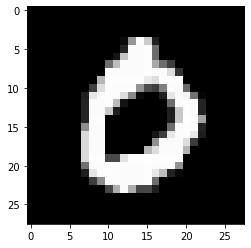

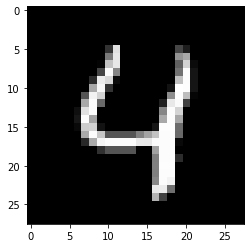

In [38]:
#visualization as images
for i in range(0,5):
 image = testX[i]
 image = np.array(image, dtype='float')
 pixels = image.reshape((28,28))
 plt.imshow(pixels, cmap = 'gray')
 plt.show()

In [39]:
## Change_2

In [40]:
from keras import layers
#build the cnn model
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='sigmoid'))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [42]:
train_images = trainX.reshape((60000, 28, 28, 1))
train_images = trainX.astype('float32') / 255
test_images = testX.reshape((10000, 28, 28, 1))
test_images = testX.astype('float32') / 255
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)


In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 138s 146ms/step - loss: 1.0952 - accuracy: 0.6231
Epoch 2/5
938/938 [==============================] - 135s 144ms/step - loss: 0.0768 - accuracy: 0.9770
Epoch 3/5
938/938 [==============================] - 136s 145ms/step - loss: 0.0527 - accuracy: 0.9844
Epoch 4/5
938/938 [==============================] - 137s 146ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 136s 145ms/step - loss: 0.0303 - accuracy: 0.9903


In [45]:
 test_loss,test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.0384 - accuracy: 0.9878


In [46]:
test_acc 

0.9878000020980835

In [47]:
hist = model.fit(trainX,trainy_one_hot, validation_data=(testX, testy_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0927 - accuracy: 0.9710 - val_loss: 0.0701 - val_accuracy: 0.9773
Epoch 2/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0663 - accuracy: 0.9788 - val_loss: 0.0461 - val_accuracy: 0.9853
Epoch 3/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0574 - val_accuracy: 0.9802


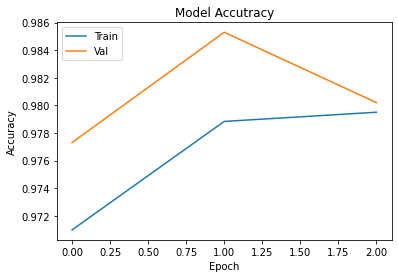

In [48]:
#visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accutracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='upper left')
plt.show()

In [49]:
#predictions as probabilites
predictions = model.predict(testX[:5])
predictions


array([[8.94370267e-09, 6.19246663e-08, 8.41123983e-06, 4.42046576e-06,
        2.75942824e-07, 4.76391229e-08, 4.59775273e-12, 9.99984741e-01,
        1.79360370e-07, 1.81787891e-06],
       [3.89534456e-04, 1.83285942e-04, 9.99018669e-01, 5.48150683e-06,
        1.77209500e-07, 2.42864758e-07, 7.28769510e-06, 4.47020175e-05,
        3.50693706e-04, 1.00977715e-08],
       [3.82959479e-06, 9.99812186e-01, 1.93534262e-07, 2.50846472e-08,
        1.04982355e-04, 3.44836303e-06, 4.38473762e-05, 7.71568830e-06,
        3.73218404e-06, 2.00507584e-05],
       [9.95705545e-01, 1.70949124e-06, 2.23413086e-03, 1.37486643e-06,
        1.21056173e-05, 5.59428772e-05, 2.15307358e-04, 1.24518573e-03,
        6.95972776e-05, 4.59135976e-04],
       [1.11184555e-07, 6.38144071e-09, 6.38812082e-07, 6.66930788e-10,
        9.99842763e-01, 1.63082028e-08, 9.87428166e-07, 7.02445035e-08,
        1.82889153e-06, 1.53496672e-04]], dtype=float32)

In [50]:
#predictions as numbers labels
import numpy as np
print(np.argmax(predictions, axis=1))
print(testy[:5])

[7 2 1 0 4]
[7 2 1 0 4]


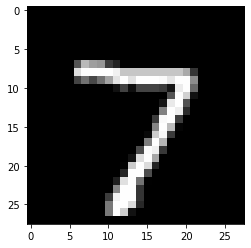

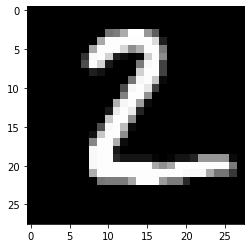

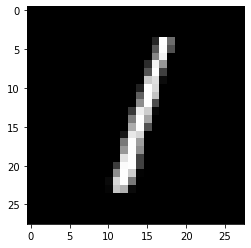

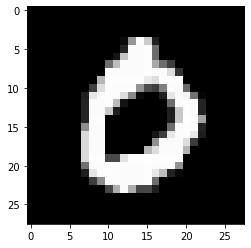

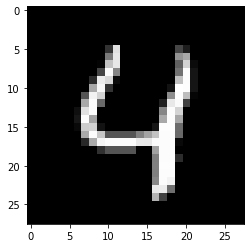

In [51]:
#visualization as images
for i in range(0,5):
 image = testX[i]
 image = np.array(image, dtype='float')
 pixels = image.reshape((28,28))
 plt.imshow(pixels, cmap = 'gray')
 plt.show()

In [52]:
## Change_3

In [53]:
from keras import layers
#build the cnn model
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='sigmoid', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [55]:
train_images = trainX.reshape((60000, 28, 28, 1))
train_images = trainX.astype('float32') / 255
test_images = testX.reshape((10000, 28, 28, 1))
test_images = testX.astype('float32') / 255
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)


In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 134s 142ms/step - loss: 1.3421 - accuracy: 0.5308
Epoch 2/5
938/938 [==============================] - 133s 142ms/step - loss: 0.1391 - accuracy: 0.9595
Epoch 3/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0862 - accuracy: 0.9755
Epoch 4/5
938/938 [==============================] - 135s 144ms/step - loss: 0.0638 - accuracy: 0.9807
Epoch 5/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0488 - accuracy: 0.9856


In [58]:
 test_loss,test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.0538 - accuracy: 0.9831


In [59]:
test_acc 

0.9830999970436096

In [60]:
hist = model.fit(trainX,trainy_one_hot, validation_data=(testX, testy_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0528 - val_accuracy: 0.9835
Epoch 2/3
1875/1875 [==============================] - 149s 79ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 3/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0440 - val_accuracy: 0.9851


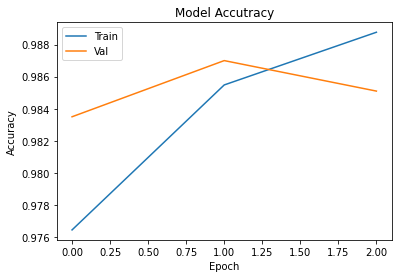

In [61]:
#visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accutracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='upper left')
plt.show()

In [62]:
#predictions as probabilites
predictions = model.predict(testX[:5])
predictions


array([[1.2271948e-07, 3.9031597e-06, 1.6401085e-05, 2.3091505e-05,
        5.4577345e-07, 1.3449908e-06, 3.4771347e-08, 9.9992621e-01,
        2.4821561e-06, 2.5863035e-05],
       [6.1826631e-06, 1.7209191e-04, 9.9977070e-01, 1.0344330e-05,
        8.5154106e-06, 2.3223490e-06, 1.5093473e-05, 6.3364132e-06,
        8.2472734e-06, 2.3616299e-07],
       [9.8807178e-08, 9.9979872e-01, 1.1589873e-06, 7.5072154e-07,
        2.6482010e-06, 7.1522231e-06, 1.4090797e-05, 8.9274356e-05,
        8.2751867e-05, 3.4112188e-06],
       [9.9906331e-01, 4.7005548e-07, 3.0178577e-05, 3.8719159e-06,
        5.5884734e-06, 1.1805243e-04, 5.3220475e-04, 2.7941289e-06,
        4.3877944e-06, 2.3914636e-04],
       [5.3688780e-07, 3.3348795e-06, 8.9079037e-07, 2.1200765e-07,
        9.9985731e-01, 2.9746678e-07, 1.0117029e-06, 1.5176124e-06,
        1.8641119e-06, 1.3299004e-04]], dtype=float32)

In [63]:
#predictions as numbers labels
import numpy as np
print(np.argmax(predictions, axis=1))
print(testy[:5])

[7 2 1 0 4]
[7 2 1 0 4]


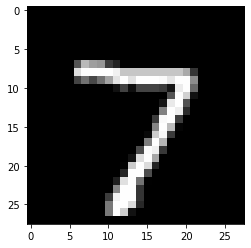

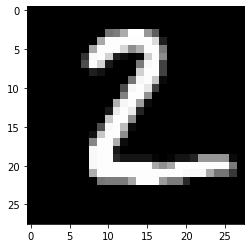

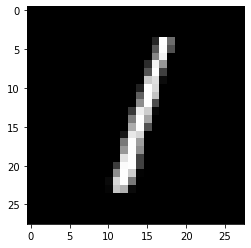

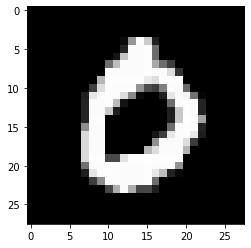

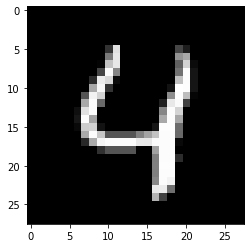

In [64]:
#visualization as images
for i in range(0,5):
 image = testX[i]
 image = np.array(image, dtype='float')
 pixels = image.reshape((28,28))
 plt.imshow(pixels, cmap = 'gray')
 plt.show()